# Equiprobable Discretization of Multivariate Lognormals

This notebook describes two ways of discretizing a multivariate lognormal distribution. Suppose $X = (X_1,\,...,\,X_n)$ are jointly lognormally distributed, with parameters $\log(X) \sim \mathcal{N}(\mu,\,\Sigma)$. We want to produce a discretized version of this distribution with atoms indexed by $[i_1,\,...,\,i_n]$ such that an approximation to the integrals of any function $\theta$ of $X$ can be given as:
$$
\begin{align*}
\mathbb{E}[\theta] &= \int_{\infty}^{\infty}\cdots\int_{\infty}^{\infty}\theta(x)f_{X}(x)dx_1\cdots dx_n\\
&\approx \sum_{i_1}\cdots\sum_{i_n}\theta(X[i_1,\,...,\,i_n])w[i_1,\,...,\,i_n]\\
&= \frac{1}{m^{n}}\sum_{i_1=1}^{m}\cdots\sum_{i_n=1}^{m}\theta(X[i_1,\,...,\,i_n])
\end{align*}
$$
To do so, we first begin with a standard $n$-variate normal given by $Z \sim \mathcal{N}(0,\,I_{n})$. Fix an integer $m$, and divide the real-line into $m$ equiprobable intervals by the standard univariate normal distribution. Let the collection of these intervals be denoted by $\mathcal{Z}$. Then $\mathcal{Z}^n$ is an equiprobable grid in $\mathbb{R}^n$ by the standard $n$-variate normal distribution.

We now want to construct a random vector $Y = (Y_1,\,...,\,Y_n)$ such that $Y \sim \mathcal{N}(\mu,\,\Sigma)$. There are two approaches to doing so.

## Eigendecomposition

Note that $\Sigma$ is a covariance matrix, and thus real-symmetric and positive semi-definite. We can decompose it into
$$
\Sigma = Q\Lambda Q^T
$$

### Approach 1

Construct a matrix $\tilde{\Sigma}$ such that
$$
\tilde{\Sigma} = Q(\Lambda)^{1/2}
$$
By construction, $\tilde{\Sigma}\tilde{\Sigma}^T = \Sigma$. Let $Y = \mu + \tilde{\Sigma}Z$. By the linear transformation theorem for multivariate normals, $Y \sim \mathcal{N}(\mu,\,\tilde{\Sigma}\tilde{\Sigma}^T) = \mathcal{N}(\mu,\,\Sigma)$.

### Approach 2

We can also use the positive-definite square root of $\Sigma$, $(\Sigma)^{1/2} = Q(\Lambda)^{1/2}Q^T = \tilde{\Sigma}Q^T$. While all the above arguments apply, the initial rotation by $Q^T$ makes for a better approximation of the true CDF.

## Cholesky Decomposition (recommended)

An alternative way of constructing $Y$ is to use the Cholesky decomposition instead. Note that $\Sigma$ is real and positive semi-definite, which implies that such a decomposition exists, with $\Sigma = LL^T$. Then, let $Y = \mu + LZ$. By the earlier argument, $Y \sim \mathcal{N}(\mu,\,\Sigma)$.

This construction can also be implemented using a simple recursive formula. Each $Y_{i}$ is written as
$$
\begin{align*}
Y_{i} = \sum_{j = 1}^{n}\text{Cov}(Y_{i},\,Z_{j})Z_{j}
\end{align*}
$$
For $j > i$, $\text{Cov}(Y_{i},\,Z_{j}) = 0$. For $j < i$
$$
\text{Cov}(Y_{i},\,Z_{j}) = \frac{\sigma_{ij} - \sum_{k < j}\text{Cov}(Y_{i},\,Z_{k})\text{Cov}(Y_{j},\,Z_{k})}{\text{Cov}(Y_{j},\,Z_{j})}
$$
For $j = i$
$$
\text{Cov}(Y_{i},\,Z_{i}) = \sqrt{\sigma_{i}^2 - \sum_{j=1}^{i}\text{Cov}(Y_{i},\,Z_{j})}
$$
with the base case for all of the above given by $\text{Cov}(Y_1,\,Z_1) = \sigma_1$.

## Computing the atoms 

Now that we have a multivariate normal distribution, we wish to compute the conditional expectation of the lognormal variables $X_i = \exp(Y_i)$ in each of the equiprobable regions of $\mathbb{R}^n$. Note, firstly, that we can compute the expectation of each lognormal variable separately in each of the regions. Further, as the regions are rectangular, we can use the following simplification:
$$
\begin{align*}
\mathbb{E}[X_i | Z \in [\underline{z}_1,\,\overline{z}_1] \times \cdots \times [\underline{z}_n,\,\overline{z}_n]] &= m^{n}\int_{\underline{z}_n}^{\overline{z}_{n}}\cdots\int_{\underline{z}_1}^{\overline{z}_1}\exp(Y_i)f_{Z}(z)dz_1\cdots dz_n\\
&= m^{n}\exp(\mu_i)\int_{\underline{z}_n}^{\overline{z}_{n}}\cdots\int_{\underline{z}_1}^{\overline{z}_1}\exp\left(\sum_{j=1}^{n}\text{Cov}(Y_{i},\,Z_{j})z_{j}\right)f_{Z}(z)dz_1\cdots dz_n\\
&= m^{n}\exp(\mu_i)\prod_{j=1}^{n}\int_{\underline{z}_{j}}^{\overline{z}_{j}}\exp\left(\text{Cov}(Y_i,\,Z_j)z_j\right)\varphi(z_j)dz_j
\end{align*}
$$
The key is to compute each of these integrals efficiently.

### Change of variables

The definite integral of a lognormal variable $X$ such that $\log(X) \sim \mathcal{N}(0,\,\sigma)$ over the interval $(\underline{x},\,\overline{x})$ can be computed using
$$
\begin{align*}
\int_{\underline{x}}^{\overline{x}}xf_{X}(x)dx = \frac{1}{2} \cdot \exp\left(\frac{\sigma^2}{2}\right) \cdot \left[\text{erf}\left(\frac{\sigma^2 - \log(\overline{x})}{\sigma\sqrt{2}}\right) - \text{erf}\left(\frac{\sigma^2 - \log(\underline{x})}{\sigma\sqrt{2}}\right)\right]
\end{align*}
$$
We apply this formula to each of the integrals above. Define $\tilde{X}_{ij} = \exp\left(\text{Cov}(Y_i,\,Z_j)Z_j\right)$. Then
$$
\int_{\underline{z}_{j}}^{\overline{z}_{j}}\exp\left(\text{Cov}(Y_i,\,Z_j)z_j\right)\varphi(z_j)dz_j = \int_{\underline{\tilde{x}}_{ij}}^{\overline{\tilde{x}}_{ij}}\tilde{x}_{ij}f_{\tilde{X}_{ij}}(\tilde{x}_{ij})d\tilde{x}_{ij}
$$
where $\underline{\tilde{x}}_{ij} = \exp(\text{Cov}(Y_i,\,Z_j)\underline{z}_j)$ and $\overline{\tilde{x}}_{ij} = \exp(\text{Cov}(Y_i,\,Z_j)\overline{z}_j)$. The integral on the right can then be computed using the formula above.

### Advantage of Cholesky Decomposition

There are a couple of reasons to prefer the Cholesky decomposition over the Eigendecomposition method. The first is that it reduces the number of computations required vis-a-vis the integrals that the number of unique integrals that need to be evaluated. Since $L$ is lower triangular, $Y_i$ is a function of $(Z_1,\,...,\,Z_i)$ but does not depend on $(Z_{i+1},\,...,\,Z_{n})$. As such, the conditional expectation problem can be reduced to:
$$
\begin{align*}
m^{n}\exp(\mu_i)\prod_{j=1}^{n}\int_{\underline{z}_{j}}^{\overline{z}_{j}}\exp\left(\text{Cov}(Y_i,\,Z_j)z_j\right)\varphi(z_j)dz_j &= m^{i}\exp(\mu_i)\prod_{j\leq i}\int_{\underline{z}_{j}}^{\overline{z}_{j}}\exp\left(\ell_{ij}z_j\right)\varphi(z_j)dz_j\\
&= m^{i}\exp(\mu_i)\prod_{j\leq i}\int_{\underline{\tilde{x}}_{ij}}^{\overline{\tilde{x}}_{ij}}\tilde{x}_{ij}f_{\tilde{X}_{ij}}(\tilde{x}_{ij})d\tilde{x}_{ij}
\end{align*}
$$
The first implication is that calculating each conditional expectation requires the product of only $i$ integrals as opposed to $n$. Further, the conditional expectation of $Y_{i}$ depends only on the first $i$ standard normal variables, which means that only $m^{i}$ conditional expectations need to be calcualted, as opposed to $m^{n}$. While vectorization neutralizes the benefit on the first count, the computation of $m^{i}$ expectations which are copied over $m^{n-i}$ times as opposed to computing $m^{n}$ expectations really speeds up the process.

Lastly, the approximation produced using the Cholesky decomposition also fits the true CDF than the one produced using the eigendecomposition, as seen in figures below.

The rest of this notebook demonstrates the discretization output and the results obtained through its use.

In [1]:
import HARK
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import integrate

First, we test a trivariate lognormal distribution. Each variable is mean-one and correlated with the others.

In [2]:
Σ = np.array([[3.0, 1.0, 2.0], [1.0, 2.0, 1.0], [2.0, 1.0, 4.0]])
μ = -np.diag(Σ) / 2  # Create mean-one lognormal

X = HARK.distributions.MultivariateLogNormal(mu=μ, Sigma=Σ)

Use direct integral solution to test the expected value.

In [3]:
%%time
f1 = lambda x: X._marginal(x, 0)
f2 = lambda x: X._marginal(x, 1)
f3 = lambda x: X._marginal(x, 2)

μ_1 = integrate.quad(lambda x: x * f1(x), 0, np.inf)[0]
μ_2 = integrate.quad(lambda x: x * f2(x), 0, np.inf)[0]
μ_3 = integrate.quad(lambda x: x * f3(x), 0, np.inf)[0]

print(μ_1)
print(μ_2)
print(μ_3)

1.0000000002309708
1.0000000000008682
0.9999999999848911
CPU times: total: 1.52 s
Wall time: 1.51 s


We now use the multivariate discretization tool to provide an approximation of the expected value. Note the improved time performance.

In [4]:
%%time
N = 10

X_approx = X._approx_equiprobable(N)

X_approx.expected()

CPU times: total: 78.1 ms
Wall time: 82 ms


array([1., 1., 1.])

We can look at the atoms of the discretized distribution. Note, there are 1000 $(10^3)$ of them, owing to the dimension of the distribution.

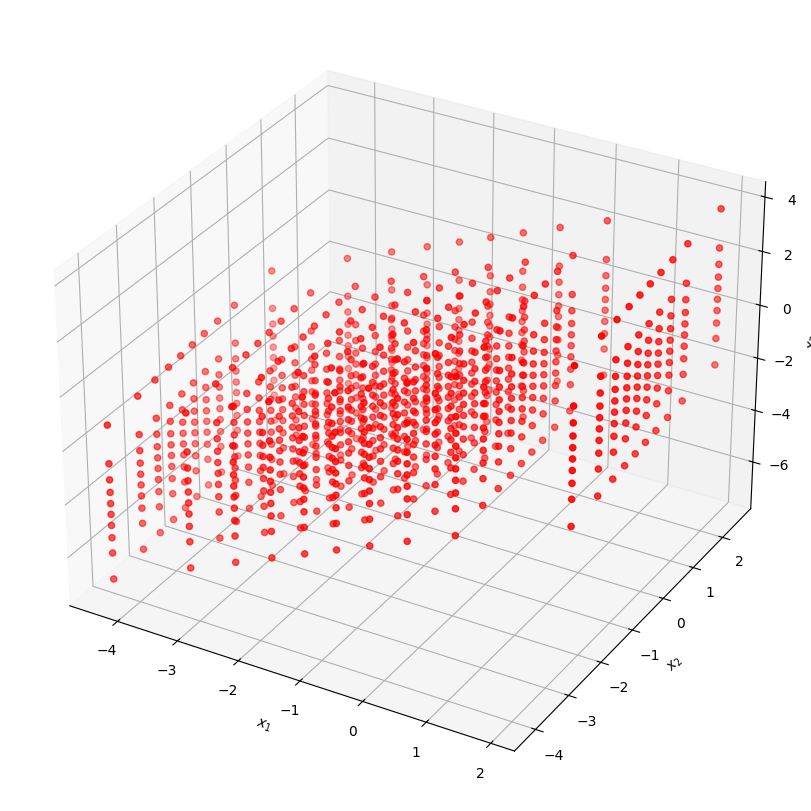

In [5]:
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
ax = plt.axes(projection="3d")

ax.scatter(
    np.log(X_approx.atoms[0].flatten()),
    np.log(X_approx.atoms[1].flatten()),
    np.log(X_approx.atoms[2].flatten()),
    color="red",
)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

We now try discretizing the distribution with the same decomposition method but a truncation at finite endpoints. In this example, the underlying standard Normal distribution is truncated to $[-3,\,3]$, such that the marginal CDFs of each of the random variables in the correlated distribution range from 0.0015 to 0.9985 in the range specified.

In [6]:
%%time
N = 10

X_approx2 = X._approx_equiprobable(N, tail_bound=0.0015, endpoints=True)

X_approx2.expected()

CPU times: total: 156 ms
Wall time: 140 ms


array([0.89439444, 0.95068046, 0.88488625])

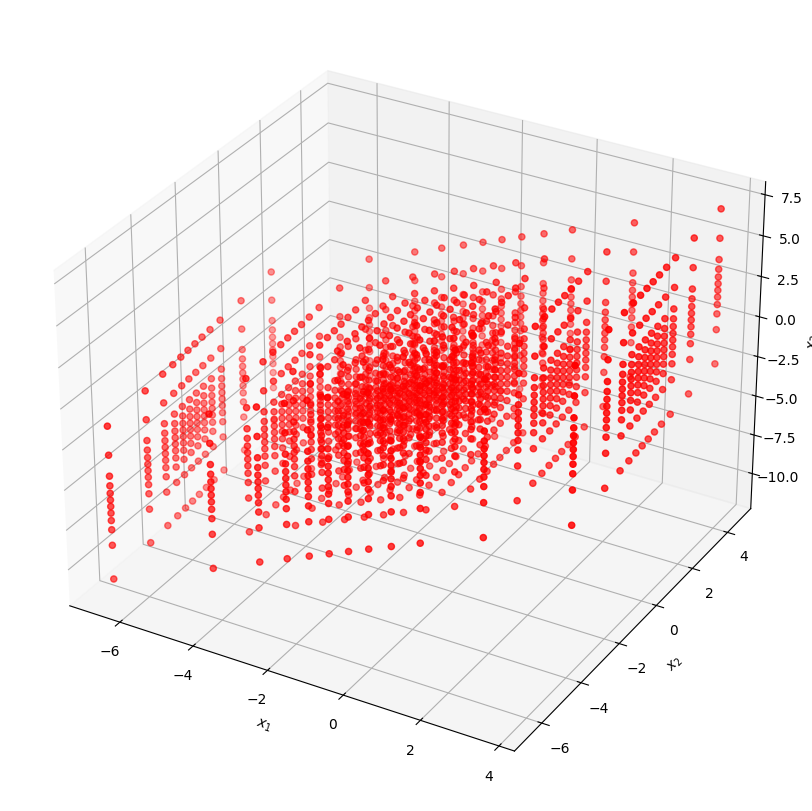

In [7]:
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
ax = plt.axes(projection="3d")

ax.scatter(
    np.log(X_approx2.atoms[0].flatten()),
    np.log(X_approx2.atoms[1].flatten()),
    np.log(X_approx2.atoms[2].flatten()),
    color="red",
)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

We now attempt an approximation of the same distribution using the eigendecomposition method instead. Note that the atoms are similarly distributed, though they have been rotated to reflect the alternate construction. Another factor is that this approach is noticeably slower than the Cholesky decomposition due to the additional computations.

In [8]:
%%time
N = 10

X_approx3 = X._approx_equiprobable(N, decomp="eig")

X_approx3.expected()

CPU times: total: 234 ms
Wall time: 195 ms


array([1., 1., 1.])

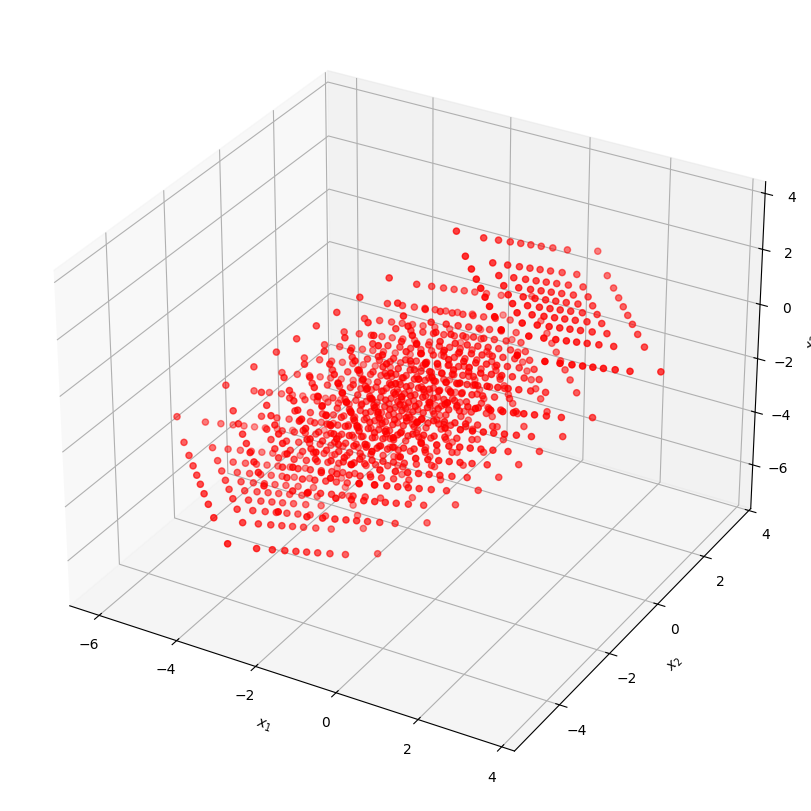

In [9]:
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
ax = plt.axes(projection="3d")

ax.scatter(
    np.log(X_approx3.atoms[0].flatten()),
    np.log(X_approx3.atoms[1].flatten()),
    np.log(X_approx3.atoms[2].flatten()),
    color="red",
)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

Now we test a bivariate distribution. One purpose of this test is to examine the approximate CDF values of the discretized distribution. The other is to compare the output from both constructions with the analytical CDF.

In [10]:
Σ = np.array([[3.0, 1.0], [1.0, 2.0]])
μ = -np.diag(Σ) / 2  # Create mean-one lognormal

X = HARK.distributions.MultivariateLogNormal(mu=μ, Sigma=Σ)

In [11]:
N = 10

X_approx = X._approx_equiprobable(N)
X_approx.expected()

array([1., 1.])

Note that the plots of the two discretizations closely match the true CDF, showing that the algorithm is working well.

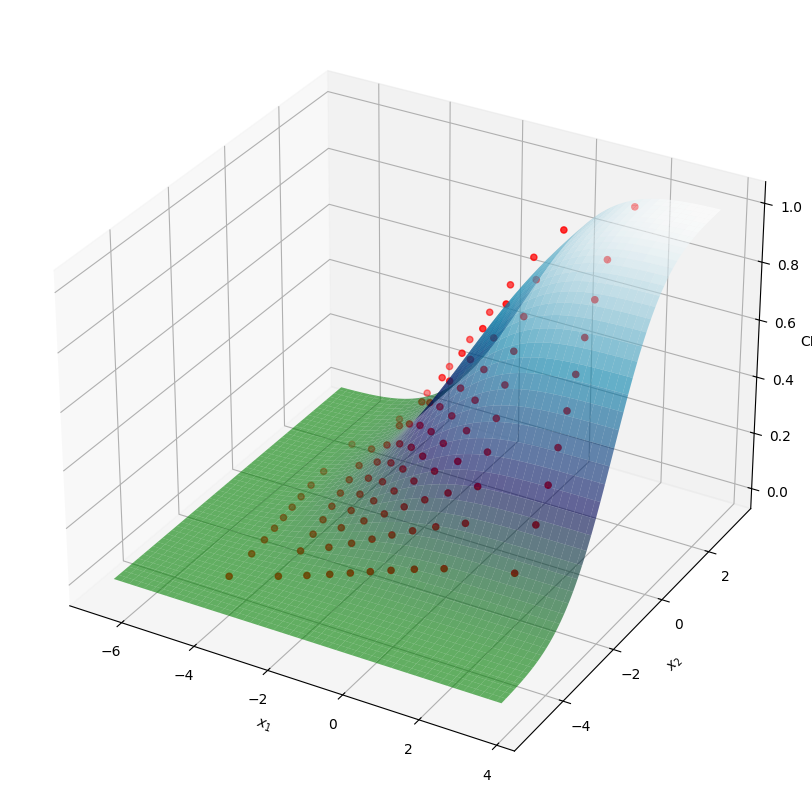

In [12]:
M = 150

σ_1, σ_2 = np.sqrt(np.diag(Σ))

x = np.linspace(-3 * σ_1, 3 * σ_1, M)
y = np.linspace(-3 * σ_2, 3 * σ_2, M)

x, y = np.meshgrid(x, y)
xf = x.flatten()
yf = y.flatten()
xy = np.stack([xf, yf], axis=1)
exy = np.exp(μ + xy)

z = X._cdf(exy).reshape(M, M)

cdf_approx = np.array(
    [
        [np.sum(X_approx.pmv.reshape(N, N)[0:j, 0:i]) for i in range(1, N + 1)]
        for j in range(1, N + 1)
    ]
)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
ax = plt.axes(projection="3d")

ax.scatter(
    np.log(X_approx.atoms[0].flatten()),
    np.log(X_approx.atoms[1].flatten()),
    cdf_approx.flatten(),
    color="red",
)
ax.plot_surface(μ[0] + x, μ[1] + y, z, alpha=0.6, cmap=cm.ocean)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("CDF")
plt.show()

Looking at the approximation using the sqaure root or eigendecomposition, note that the result is a different (although not much worse) estimation of the true CDF, despite the expectation of the discrete approximation remaining unchanged.

In [13]:
N = 10

X_approx2 = X._approx_equiprobable(N, decomp="sqrt")
X_approx2.expected()

array([1., 1.])

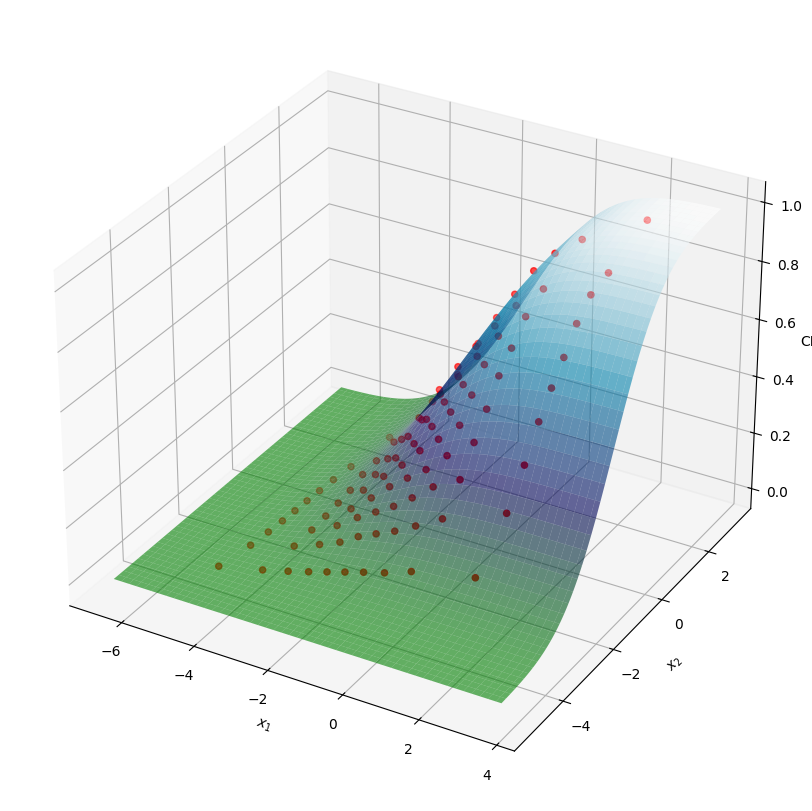

In [14]:
M = 150

σ_1, σ_2 = np.sqrt(np.diag(Σ))

x = np.linspace(-3 * σ_1, 3 * σ_1, M)
y = np.linspace(-3 * σ_2, 3 * σ_2, M)

x, y = np.meshgrid(x, y)
xf = x.flatten()
yf = y.flatten()
xy = np.stack([xf, yf], axis=1)
exy = np.exp(μ + xy)

z = X._cdf(exy).reshape(M, M)

cdf_approx = np.zeros(N**2)

for i in range(N**2):
    atom = X_approx2.atoms[:, i]
    for j in range(N**2):
        if np.all(X_approx2.atoms[:, i] > X_approx2.atoms[:, j]):
            cdf_approx[i] += X_approx2.pmv[j]

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
ax = plt.axes(projection="3d")

ax.scatter(
    np.log(X_approx2.atoms[0].flatten()),
    np.log(X_approx2.atoms[1].flatten()),
    cdf_approx.flatten(),
    color="red",
)
ax.plot_surface(μ[0] + x, μ[1] + y, z, alpha=0.6, cmap=cm.ocean)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("CDF")
plt.show()

Finally, we can add see how the CDF is approximated with the tail points functionality enabled. As it happens, the curvature at the tails is approximated better in this manner.

In [15]:
N = 10

X_approx3 = X._approx_equiprobable(N, tail_bound=0.0015, endpoints=True)
X_approx3.expected()

array([0.89439444, 0.95068046])

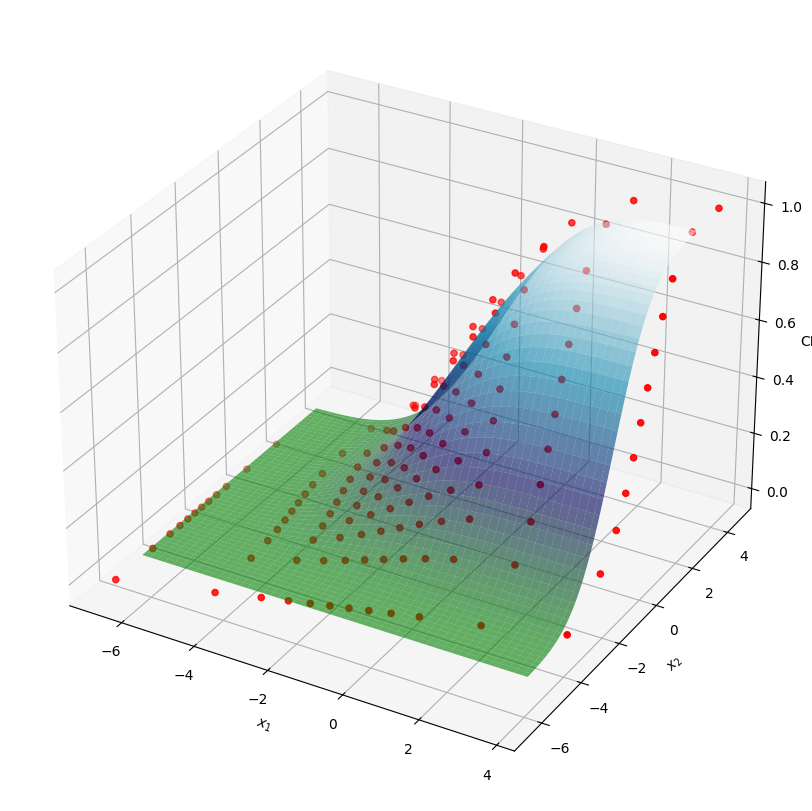

In [16]:
M = 150

σ_1, σ_2 = np.sqrt(np.diag(Σ))

x = np.linspace(-3 * σ_1, 3 * σ_1, M)
y = np.linspace(-3 * σ_2, 3 * σ_2, M)

x, y = np.meshgrid(x, y)
xf = x.flatten()
yf = y.flatten()
xy = np.stack([xf, yf], axis=1)
exy = np.exp(μ + xy)

z = X._cdf(exy).reshape(M, M)

cdf_approx = np.array(
    [
        [np.sum(X_approx3.pmv.reshape(12, 12)[0:j, 0:i]) for i in range(1, N + 3)]
        for j in range(1, N + 3)
    ]
)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
ax = plt.axes(projection="3d")

ax.scatter(
    np.log(X_approx3.atoms[0].flatten()),
    np.log(X_approx3.atoms[1].flatten()),
    cdf_approx.flatten(),
    color="red",
)
ax.plot_surface(μ[0] + x, μ[1] + y, z, alpha=0.6, cmap=cm.ocean)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("CDF")
plt.show()